## Method A

Algorithm Implementation -
Select at least Two Papers and reimplement the method proposed in the papers. Let's call them Method A and Method B. 

 -  Option 1: Implement the algorithm from scratch.
 - Option 2: Use the code provided by the authors (if available) and modify or analyze it as needed.
        (Ensure your implementation can adapt to the ECG5000 dataset.)
    - Document your implementation process and any challenges faced.

Evaluation -
Evaluate the algorithm’s performance using appropriate metrics (e.g., accuracy, sensitivity, specificity).
Compare the performance of your Methods A and B with KNN (you can call it Method C).

Method A Paper: https://ieeexplore.ieee.org/abstract/document/9662723

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import layers, models, Input

from ecgLoader import load_ecg5000

X_train, X_test, y_train, y_test = load_ecg5000(one_hot=True)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]





Applied one-hot encoding: (3998, 5)


In [2]:
def attention_block(inputs):
    attention = layers.Dense(1, activation='tanh')(inputs)
    attention = layers.Flatten()(attention)
    attention = layers.Activation('softmax')(attention)
    attention = layers.RepeatVector(inputs.shape[-1])(attention)
    attention = layers.Permute([2, 1])(attention)
    return layers.Multiply()([inputs, attention])

def build_cnn_attention_model(input_shape=(140, 1), num_classes=5):
    inputs = Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=5, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = attention_block(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [3]:
model = build_cnn_attention_model()
model.summary()

history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=64)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 140, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 140, 64)   │        384 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 70, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 70, 128)   │     24,704 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 35, 128)   │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 35, 1)     │        129 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 35)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 35)        │          0 │ flatten[0][0]     │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector       │ (None, 128, 35)   │          0 │ activation[0][0]  │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 35, 128)   │          0 │ repeat_vector[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 35, 128)   │          0 │ max_pooling1d_1[… │
│                     │                   │            │ permute[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 4480)      │          0 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │    286,784 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 5)         │        325 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 312,326 (1.19 MB)

 Trainable params: 312,326 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.8238 - loss: 1.0409 - val_accuracy: 0.9688 - val_loss: 0.0869
Epoch 2/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9828 - loss: 0.0631 - val_accuracy: 0.9812 - val_loss: 0.0974
Epoch 3/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9870 - loss: 0.0516 - val_accuracy: 0.9800 - val_loss: 0.0632
Epoch 4/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9875 - loss: 0.0461 - val_accuracy: 0.9800 - val_loss: 0.0601
Epoch 5/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9883 - loss: 0.0389 - val_accuracy: 0.9837 - val_loss: 0.0511
Epoch 6/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9906 - loss: 0.0432 - val_accuracy: 0.9825 - val_loss: 0.0437
Epoch 7/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9912 - loss: 0.0375 - val_accuracy: 0.9837 - val_loss: 0.0411
Epoch 8/25
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9896 - loss: 0.0427 - val_accuracy: 0.9837 - v

In [4]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       591
           4       1.00      0.99      0.99       409

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



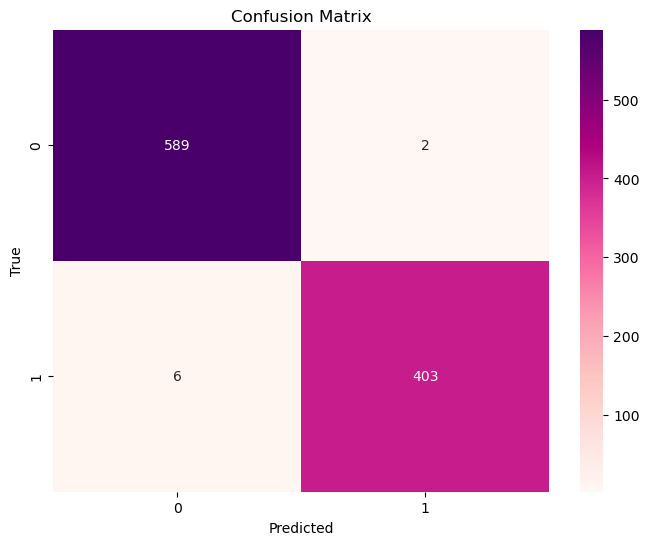

In [5]:
print(classification_report(y_true_labels, y_pred_labels))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Let's try another dataset

In [6]:
from ecgLoader import load_heartbeat_dataset

X_train, X_test, y_train, y_test = load_heartbeat_dataset(one_hot=True)


X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(X_train.shape, y_train.shape)

(87556, 187, 1, 1) (87556, 5)


In [7]:
def build_cnn_attention_model_heartbeat(input_shape=(187, 1), num_classes=5):
    inputs = Input(shape=input_shape)
    x = layers.Conv1D(64, kernel_size=5, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Conv1D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = attention_block(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [8]:
model = build_cnn_attention_model_heartbeat()
model.summary()

history = model.fit(X_train, y_train, validation_split=0.2, epochs=25, batch_size=64)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 187, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 187, 64)   │        384 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 93, 64)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 93, 128)   │     24,704 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 46, 128)   │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 46, 1)     │        129 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 46)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 46)        │          0 │ flatten_2[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ repeat_vector_1     │ (None, 128, 46)   │          0 │ activation_1[0][… │
│ (RepeatVector)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute_1 (Permute) │ (None, 46, 128)   │          0 │ repeat_vector_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_1          │ (None, 46, 128)   │          0 │ max_pooling1d_3[… │
│ (Multiply)          │                   │            │ permute_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 5888)      │          0 │ multiply_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │    376,896 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 5)         │        325 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 402,438 (1.54 MB)

 Trainable params: 402,438 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 51s 41ms/step - accuracy: 0.8985 - loss: 0.3991 - val_accuracy: 0.9556 - val_loss: 0.1659
Epoch 2/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9570 - loss: 0.1597 - val_accuracy: 0.9662 - val_loss: 0.1306
Epoch 3/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.9663 - loss: 0.1235 - val_accuracy: 0.9708 - val_loss: 0.1070
Epoch 4/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.9735 - loss: 0.0988 - val_accuracy: 0.9732 - val_loss: 0.0971
Epoch 5/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 37s 33ms/step - accuracy: 0.9753 - loss: 0.0892 - val_accuracy: 0.9749 - val_loss: 0.0908
Epoch 6/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - accuracy: 0.9774 - loss: 0.0789 - val_accuracy: 0.9756 - val_loss: 0.0892
Epoch 7/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 57s 52ms/step - accuracy: 0.9797 - loss: 0.0700 - val_accuracy: 0.9769 - val_loss: 0.0821
Epoch 8/25
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 55s 50ms/step - accuracy: 0.9814 -

In [9]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

685/685 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18160
           1       0.84      0.77      0.80       535
           2       0.95      0.95      0.95      1402
           3       0.89      0.73      0.80       158
           4       0.99      0.99      0.99      1635

    accuracy                           0.98     21890
   macro avg       0.93      0.89      0.91     21890
weighted avg       0.98      0.98      0.98     21890



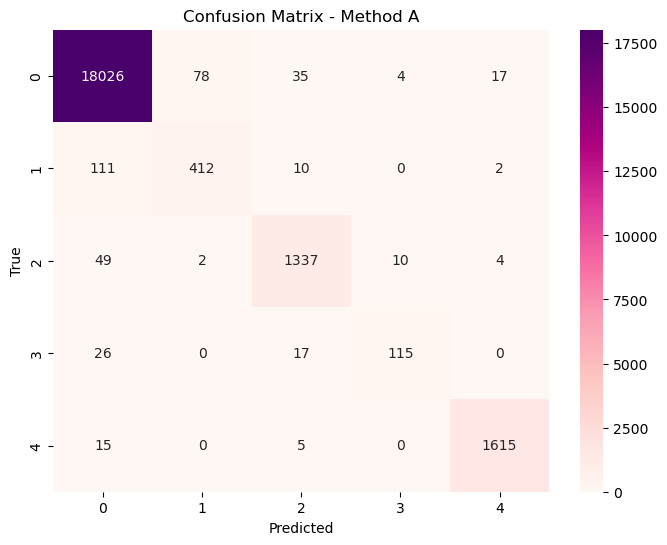

In [10]:
print(classification_report(y_true_labels, y_pred_labels))

cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Method A')
plt.show()